In [1]:
# Human Survival Status Prediction After heart Attack 

There are some factors that afftecs the Death event. This dataset cointains information like sex, age, BP, smoke, Diabetes, serum ceratine , ceratinine phosphokinase and time for Prediction of Death

Important Libararies

In [2]:
import numpy as np  # fundamental package for scientific computation in python. provides multidimensional array object, including mathematical logic, shape amuplation 
# sorting selection i/o discrete fourier transoform , basics of linear algebra, basic statiscal operation , random simulation.
# installation --> pip install numpy
# import --> import numpy as np
import pandas as  pd  # important library for Data processing and data analysis. Helpful in datacleaning , restructing, merging etc. working with pandas is fasta 
#provides the fast data processing as Numpy with flexible data mauplation techniques as spreedsheet and relational databases. It easily integrates with matplotlib
# most importantly it provides two very important data structures i.e Series and DataFrame.
# Series --> onedimensional array that can stores various types of data types, including mix data types. -- only one type of index --> row lables
# DataFrame --> widely used datastructure of pandas. it work with two dimesional arrays. -- two types of index--Column and row index
# installation --> pip install pandas
# import pandas as pd
import matplotlib.pyplot as plt  # it graphs the data on figure which can can have multiple Axes. Highlt used for data visulazation. it plots 2D plots from data in arrays.it uses numpy 
# for numerical mathematics.
#Installation --> pip install matplotlib
# import -->import matplotlib as plt
import seaborn as sns # a data visualization library based on matplotlib. provides high-level of interface for drawing attarative and information statistcal graphics
# it help to explore and understand the data. It plotting functions operate on dataframes and arrays cointaining whole datasets amd internally perform the necessary 
# semantic mapping asn statiscal aggregation to produce informative plots. Provies High level of API for statical graphics.
# installation --> pip install seaborn
# import --> import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error # it is a free software machine learning library for the python. 
# it include various classification, regression and clustering algorthm including Support-vector machine , random-forest, gradient boosting, K-means, DBSCAN
# installation --> pip install -U scikit-learn
# import --> import sklearn
from colorama import Fore, Back, Style  # it is a module to display the text in different colors. it is used to make the code for more readable. Thre formatting options are available
# front, back, style. 
# insatallation --> pip install colorma 
#import --> import colorma 



Creation of Data Frame 
It is a 2D labeled data structure with columns of potentially different types. can be formed by xlxs,cvs files

In [3]:
#Dataframe 
df= pd.read_csv("heart_failure_clinical_records_dataset.csv")
# Displaying DataFrame
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

Features and Lables of Data set

There are some features which affects the Heart Failure. Which I will foucusing on. How thay effect on the situation when heart attact takes place. All the features which are mentioned are labled in the CSV.

1. Anaemia -> it is the condition in which blood doesnt have enough amout of healthy RBC's. It results from lack of RBC's or disfunctional  
              RBC's. It leads to reduces oxygen flow to the body organs. Gnerally it is decreasing of RBC's or hemoglobin. (Boolean)

2. Ceratinine phosphokinase -> It is an enzyme which expressed by various tissues and cell types. Ck caltalyses the conversion of creatine  
                               and  uses adenosine triphosphate to create phosphocreatine and adenosine diphiosphate. Level of CPK enzyme in bloog (mcg/L)

3. Diabetes -> It is an chronic diseae that occur when the pancreas does not produce enough insuline or when the body cannot effectively use 
               insuline it produce.

4. Ejection fractions -> It the volumetric fraction of fluid eject from a chamber with each contraction. It can refer to the cardiac atrium, 
                         ventrical , gall bladder or leg veins. Although it usually refers to the left ventrical of the heart. 
                         It is the percentage of blood leaving the heart on each contraction(Percentage)

5. High Blood pressure -> ALso also hypertension, is a blood pressure that is higer than normal. It changes according to the activities we 
                          perform. A condition in which the force of the blood against artery walls is too high.(Boolean)

6. Platletes -> Number of platekets in the blood (kiloplates/mL)                          

7. Serum Creatinine -> It is test to measure of how well your keydneys are perporming their job or filtering waste from you blood. level of 
                       Serum Creatinine in blood (mg/dl)

8. Erum Sodium -> It is the sodium blood test measure the concentration of sodium in blood. Sodium can also be measure using a Urine 
                  test. . Level of serum sodium in the blood(mEq/L)
    
9. Sex -> Woman ro Man(Boolean)

10. Death -> Survived or Not Survived(Boolean)

Here we will have some assumptions

1. Sex -> Gender of patient Male=1, Female=0
2. Age -> Age of Patient
3. Diabetes -> No=0, Yes=1
4. Anaemia -> No=0, Yes=1
5. Smaoking -> No=0, Yes=1
6. Death Event -> No=0, Yes=1



In [4]:
# Exploring the data- displaying the head 10 of the data

df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
#describing the data Using function df.
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [6]:
#describing the data Using function df.describe for only top 10 rows
df.head(10).describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,68.000000,0.600000,974.800000,0.200000,33.300000,0.300000,266371.606000,2.420000,131.900000,0.800000,0.400000,8.000000,1.0
std,12.064641,0.516398,2424.244661,0.421637,17.732895,0.483046,100597.978277,2.505904,6.436873,0.421637,0.516398,2.054805,0.0
min,50.000000,0.000000,47.000000,0.000000,15.000000,0.000000,127000.000000,1.100000,116.000000,0.000000,0.000000,4.000000,1.0
25%,61.250000,0.000000,128.750000,0.000000,20.000000,0.000000,205500.000000,1.225000,130.250000,1.000000,0.000000,7.000000,1.0
50%,65.000000,1.000000,158.500000,0.000000,27.500000,0.000000,263358.030000,1.700000,132.500000,1.000000,0.000000,8.000000,1.0
75%,75.000000,1.000000,297.750000,0.000000,39.500000,0.750000,311500.000000,2.050000,136.750000,1.000000,1.000000,10.000000,1.0
max,90.000000,1.000000,7861.000000,1.000000,65.000000,1.000000,454000.000000,9.400000,138.000000,1.000000,1.000000,10.000000,1.0


In [7]:
# Now in the data we will be checking whether the data is having any Null values of not
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In the above cell we can see that there is no null values

finding the correlation of each labled values 
Correlation -> It describe the strength of an association between two vairables, and is completly symmetrical i.e the correlation between A and B is  same as the correlation between B and A.

In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Distribution of the Data -> it is the shape of the graph when all the possible values are plotted on a frequency graph. It is used to make consclusion of the dat. 

In [10]:
plt.figure(figsize=(22,6),dpi=800)
sns.countplot(data=df,x='age')
plt.title("Age distribution")

Text(0.5, 1.0, 'Age distribution')

Distribution of Data According to Gender

<AxesSubplot: xlabel='sex', ylabel='age'>

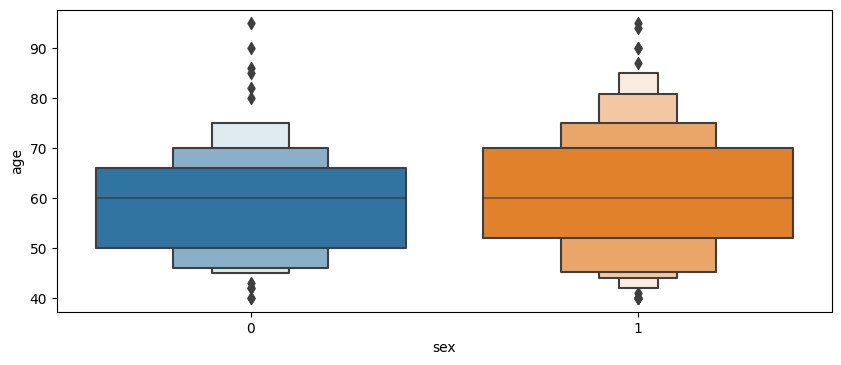

In [11]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxenplot(data=df, x='sex',y='age')

C:\Users\ompra\AppData\Local\Temp\ipykernel_20024\2655776394.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maleSurvived = male[df['DEATH_EVENT']==0]  # assigning maleSurvived as 0
C:\Users\ompra\AppData\Local\Temp\ipykernel_20024\2655776394.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maleNotSurvived = male[df['DEATH_EVENT']==1] # assigning maleNotSurvived as 1
C:\Users\ompra\AppData\Local\Temp\ipykernel_20024\2655776394.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femaleSurvived = female[df['DEATH_EVENT']==0]  # assigning femaleSurvived as 0
C:\Users\ompra\AppData\Local\Temp\ipykernel_20024\2655776394.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femaleNotSurvived = female[df['DEATH_EVENT']==1] # assigning femaleSurvived as 1
C:\Users\ompra\AppData\Local\Temp\ipykernel_20024\2655776394.py:12: UserWarning: Boolean Series key will be r

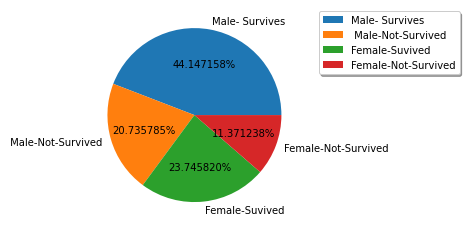

In [12]:
male = df[df['sex']==1]  # assigning  male as 1  
female = df[df['sex']==0] # assigning female as 0
maleSurvived = male[df['DEATH_EVENT']==0]  # assigning maleSurvived as 0
maleNotSurvived = male[df['DEATH_EVENT']==1] # assigning maleNotSurvived as 1
femaleSurvived = female[df['DEATH_EVENT']==0]  # assigning femaleSurvived as 0
femaleNotSurvived = female[df['DEATH_EVENT']==1] # assigning femaleSurvived as 1
maleSurvived.reset_index(drop=True, inplace=True)
maleNotSurvived.reset_index(drop=True, inplace=True)
femaleSurvived.reset_index(drop=True, inplace=True)
femaleNotSurvived.reset_index(drop=True, inplace=True)

values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]), len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
labels = ["Male- Survives"," Male-Not-Survived", "Female-Suvived", "Female-Not-Survived"]
plt.pie(values, labels=labels, autopct="%2f%%")
plt.legend(bbox_to_anchor=(1.05, 1), shadow=True)
plt.show()


Now we will seeing the Survival status by age

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

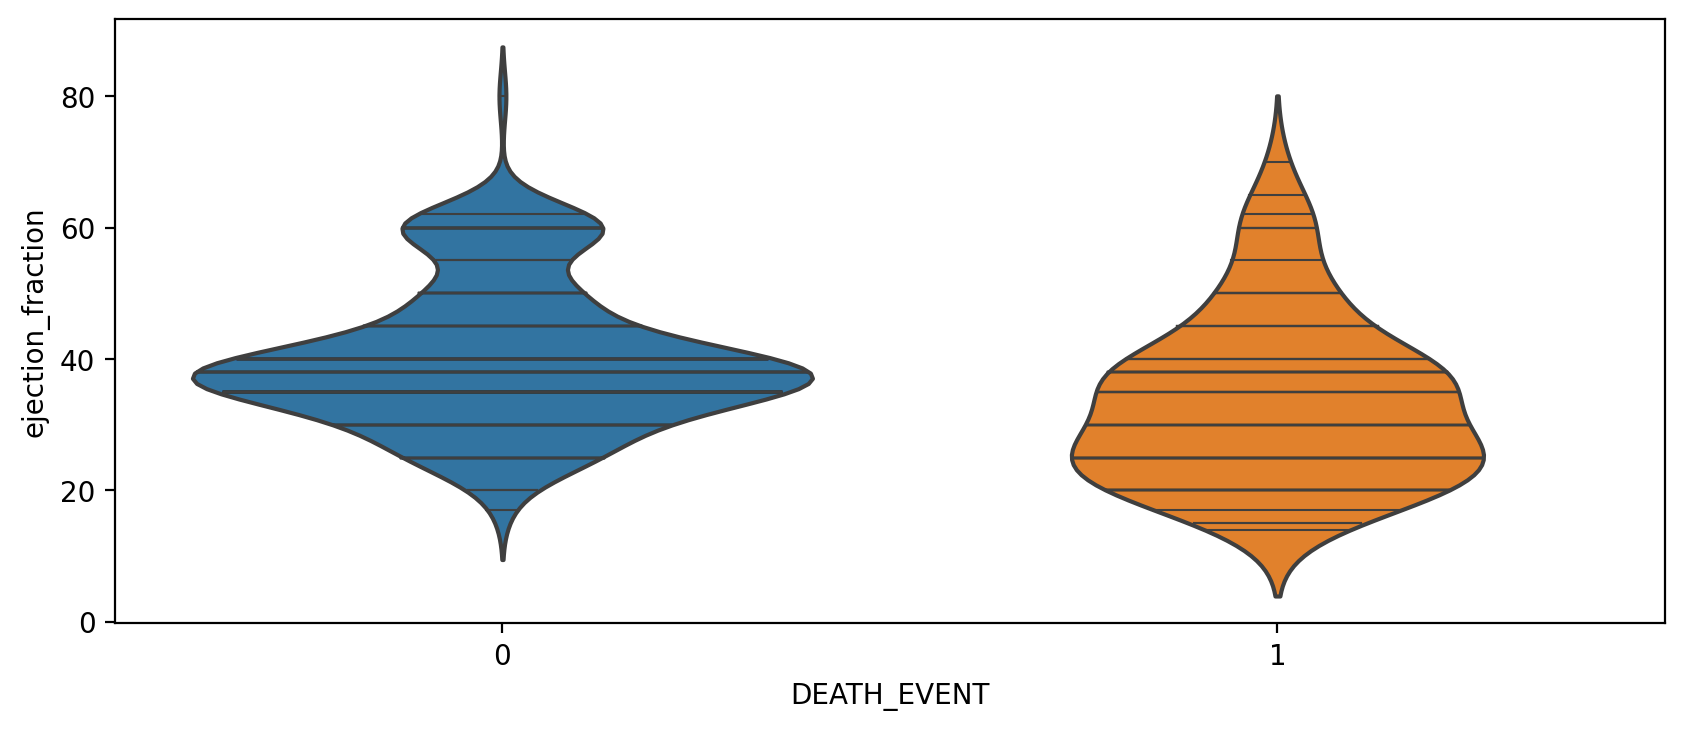

In [13]:
plt.figure(figsize=(10,4), dpi=200)
sns.violinplot(data=df, y='ejection_fraction', x="DEATH_EVENT", inner='stick',split='True')

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='high_blood_pressure'>

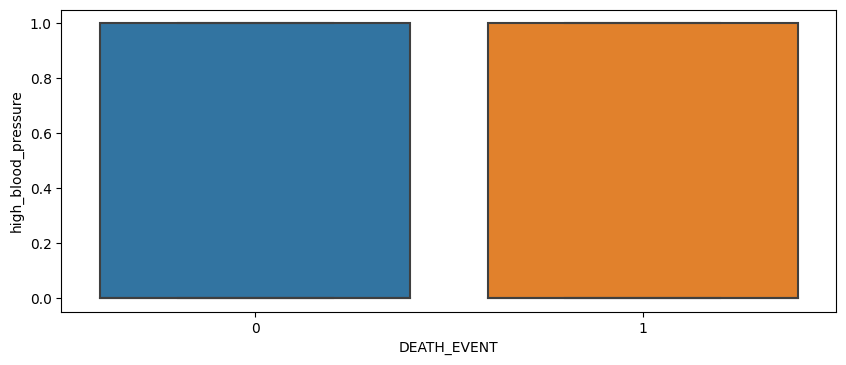

In [14]:
plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y='high_blood_pressure',x='DEATH_EVENT')

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

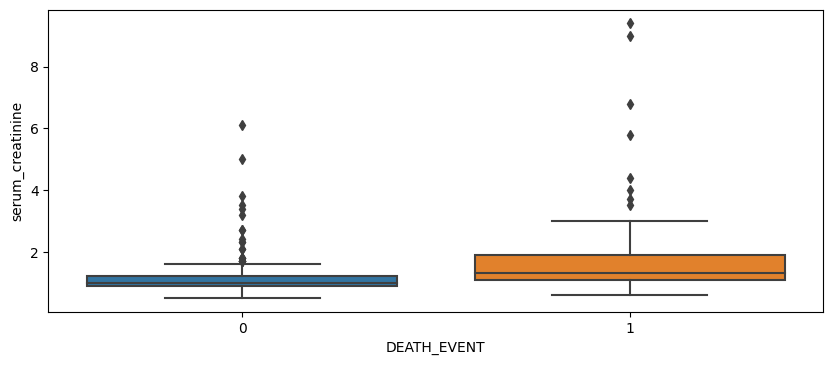

In [15]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='serum_creatinine',x='DEATH_EVENT')

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='time'>

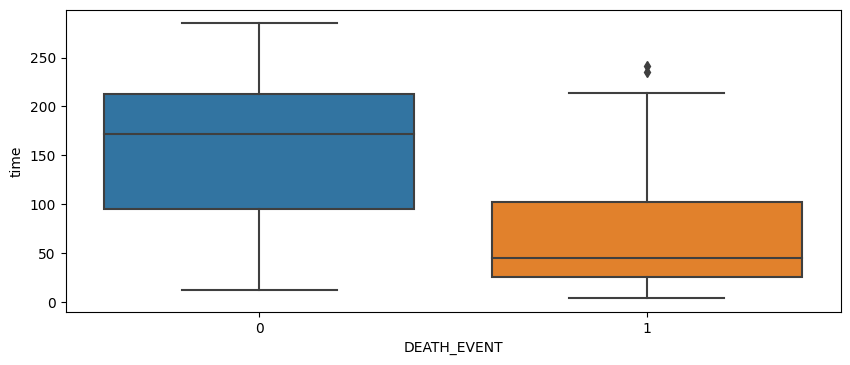

In [16]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='time',x='DEATH_EVENT')

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='serum_sodium'>

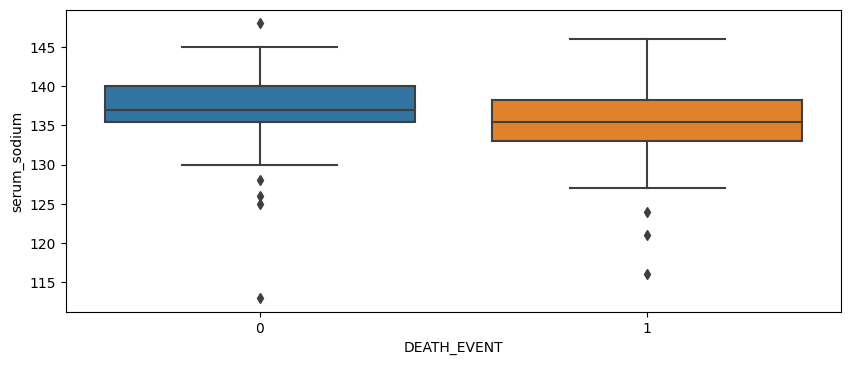

In [17]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='serum_sodium',x='DEATH_EVENT')

<Figure size 2500x400 with 0 Axes>

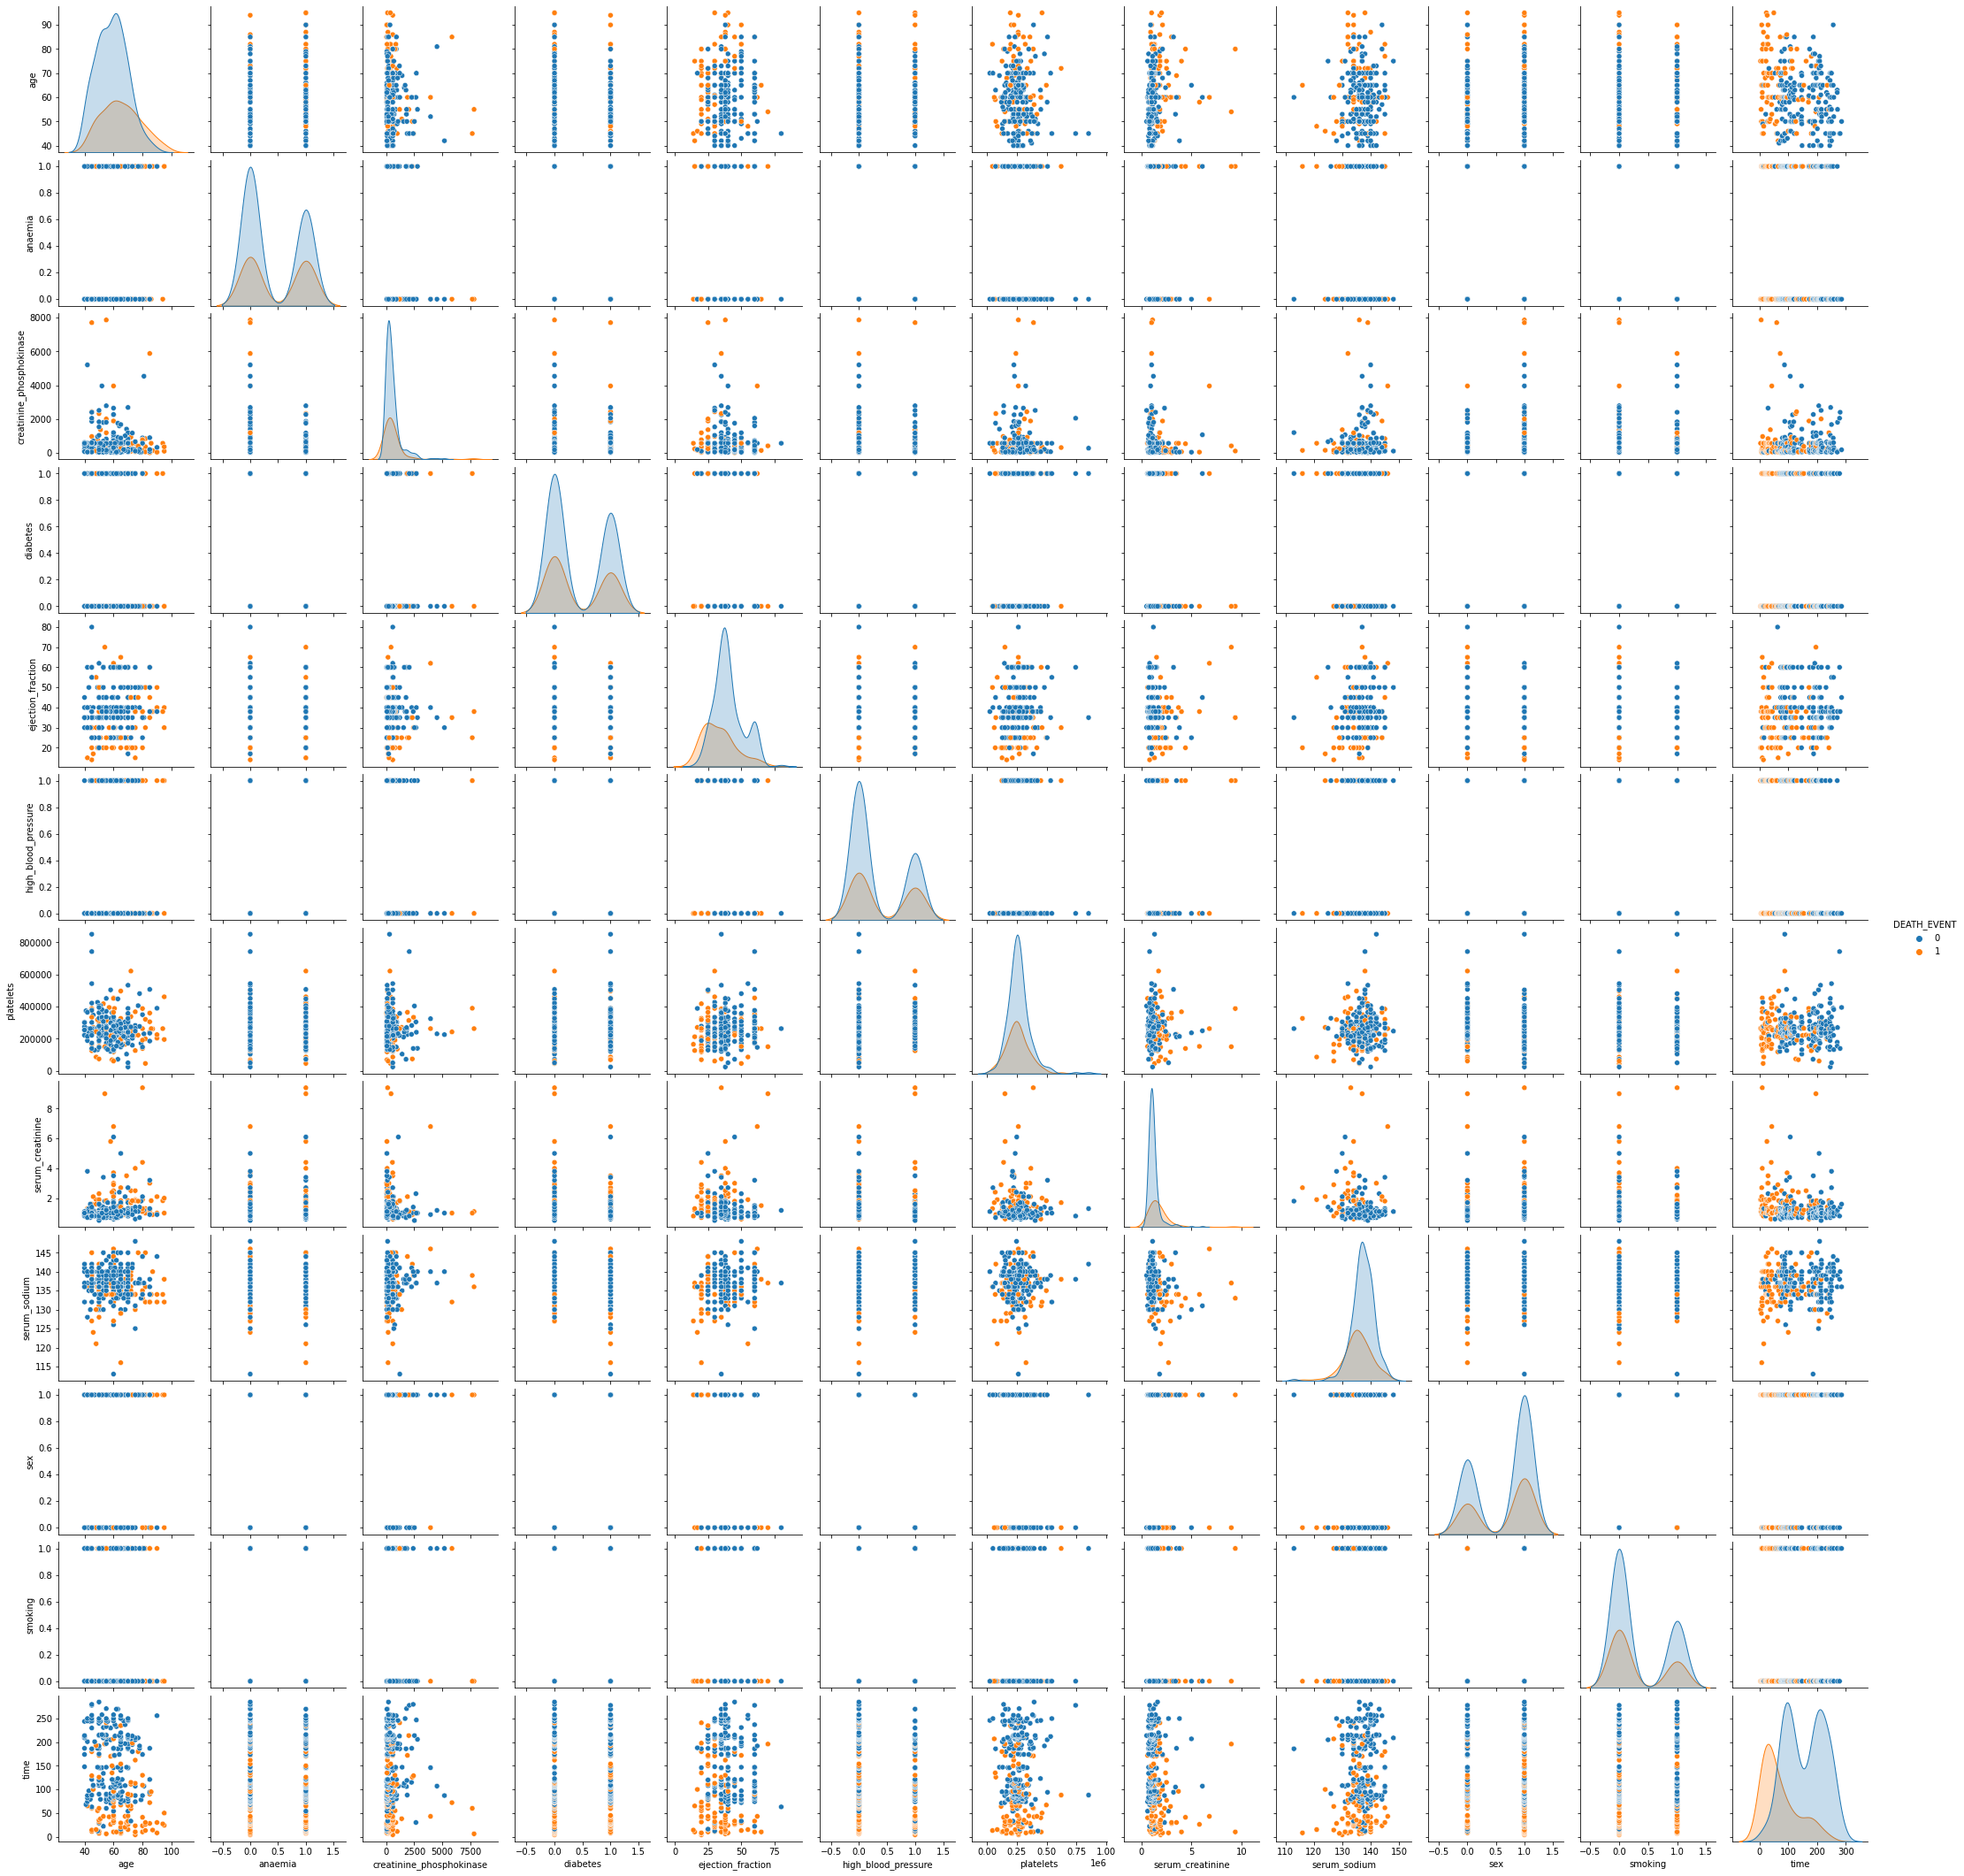

In [18]:
plt.figure(figsize=(25,4),dpi=100)
sns. pairplot(df,hue='DEATH_EVENT')

Heatmap --> These are the mode of data visualization technique that shows magnitude of the phenomenon as color in two dimension. The variety of the color may be hue or intensity. These are the graphical represenataion of data that utilize color-coded system.The primary purpose of this is to better visualize the volume of locations/ events within datasets and assist in directing viewers towards areas on data visualtion that matters most.

<AxesSubplot: >

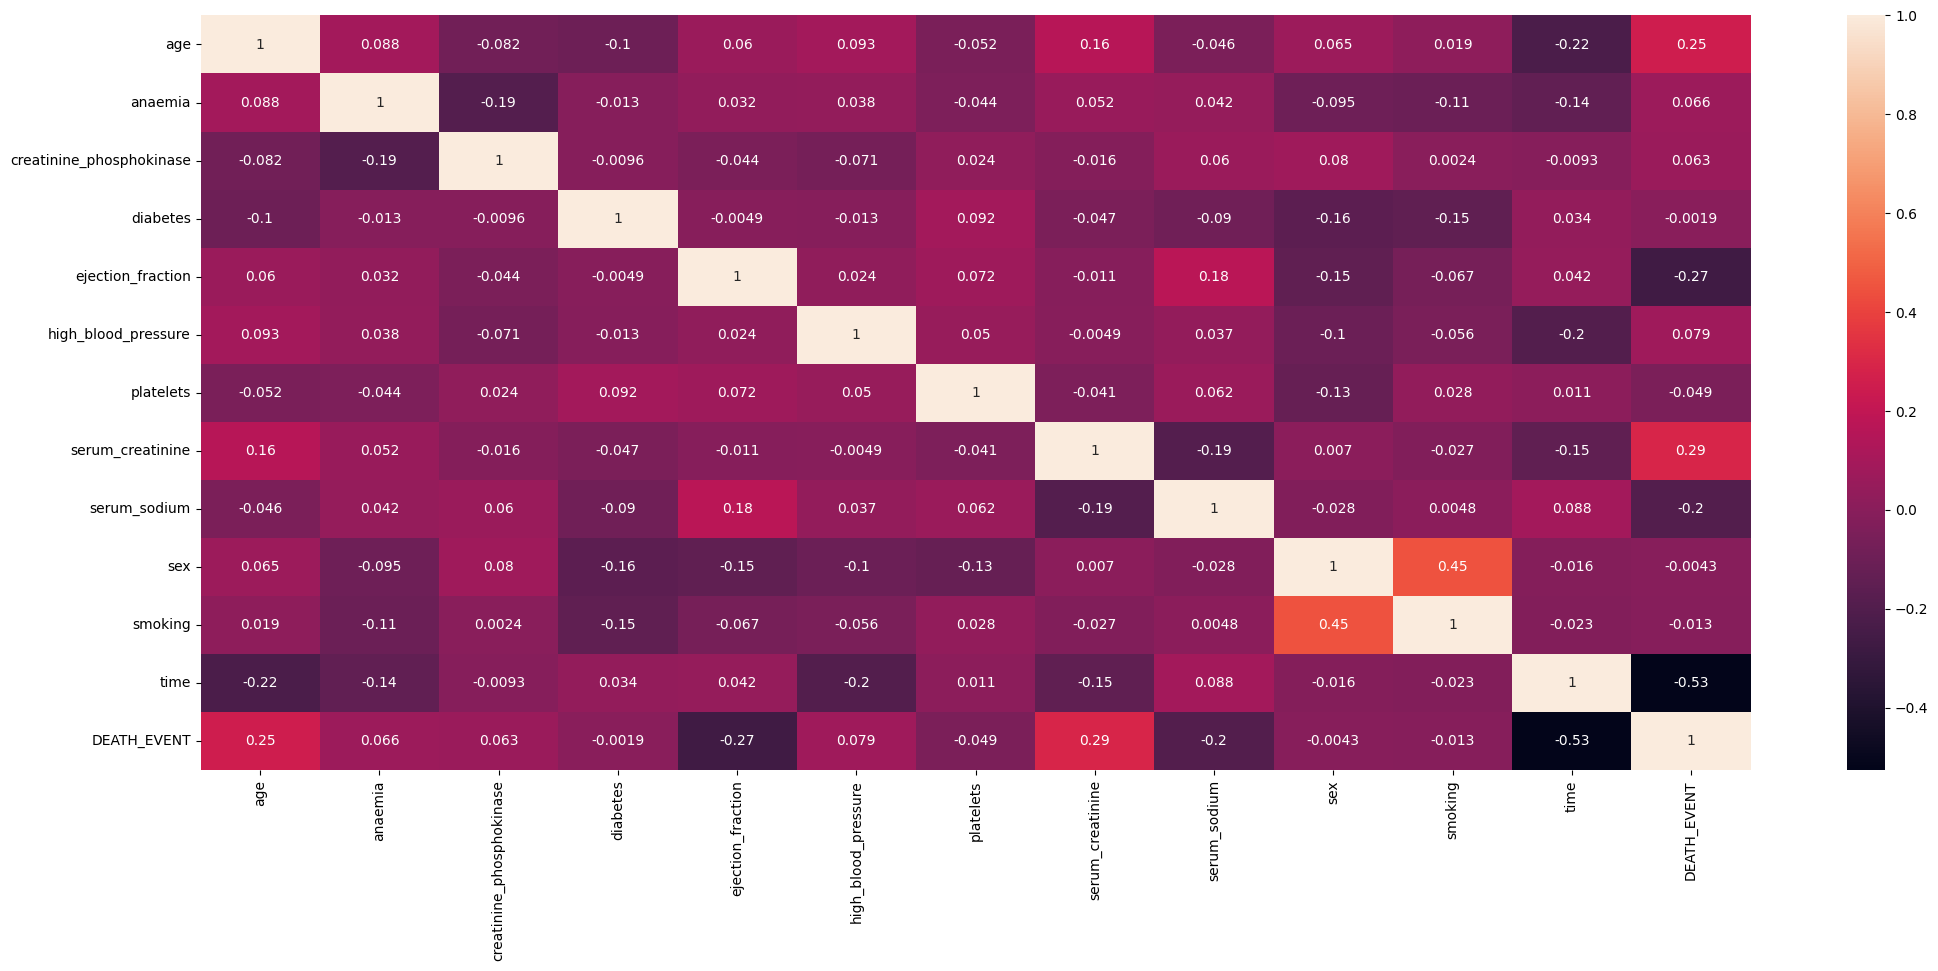

In [19]:
plt.figure(figsize=(25,10),dpi=100)
sns.heatmap(df.corr(), annot=True)

Logistic Regression --> It is a statiscal method that is used for building machine learnig models where the dependent vairable is dichotomous. i.e binary.
It is used to descrive the relation between one dependent and one independent vairable.
It is most important machine learning algorithm, which comes under the Suprivised learning technique. It is used for predicting the categorical dependent vairable using a given set of vairable.
It predicts the output of a categorical dependent vairable. Therefore the outcome must be categorical or discrete. It can be either "Yes" or "No" , "0" or "1" , "True" , "False". 
 But instead of giving the exact values as 0 and 1, it gives the probablistics values lie betweem 0 and 1.
 It is used for solving classification problems.
 



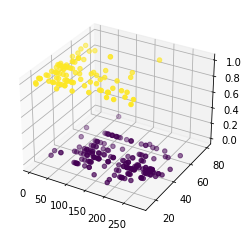

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection= "3d")
ax.scatter(df['time'], df['ejection_fraction'], df['DEATH_EVENT'], c=df['DEATH_EVENT'])

In [21]:
# WORKING on the feature 
features = ['time', 'ejection_fraction', 'serum_creatinine', 'high_blood_pressure', 'serum_sodium']
x= df[features]
y= df['DEATH_EVENT']

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=101)


In [23]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test);


In [24]:
from sklearn.linear_model import LogisticRegression
accuracy_list = []
log_model =LogisticRegression()
log_model.fit(scaled_x_train, y_train)


LogisticRegression()

In [25]:
log_model.coef_

array([[-1.4274213 , -0.76196611,  0.68057401,  0.05489217, -0.23402553]])

In [26]:
y_pred=log_model.predict(scaled_x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [27]:
log_reg_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*log_reg_acc)
print(Fore.BLUE + "Accuracy of the logistic regression is : " , "{:.2f}%".format(100*log_reg_acc))

Accuracy of the logistic regression is :  96.67%


Confuiosn Matrix  --> It is performance measurment for machine learning classification problem where output can be two or more.
It is a table with 4 different combinations of predicted and actual values.

It is extremly used for measuring Recall, Precision, Specificity, Accuracy and most importtant AUC-ROC Curve.

It have four terms TP, FP, FN, TN

True Positive --> Predicted Positive and it's True
True Negative --> Predicted Negative and it's True
False Positive (Type Error 1) --> Predicted Positive and it's False
False Negative (Type Error 2) --> Predicted Negative and it's False

Recall --> Recall = TP/(TP+FN) from all positive how many we predicted correctly.  It shoud be High
Precision --> Precision = TP/(TP+FP) from all classes we predicted positive how many are actually positive
Accuracy --> From all classes (Positive and Negative), how many of them we have predicted correctly. Accuracy should be high.
F-measure --> F-measure= 2*Recall*Precision/(Recall+ Precision)  we use F-measure becure it is difficlt to compare model with low precision and high recall or vice-versa. So, it helps to measure the Recall and Preciosion in same time. It uses HP in please Ap 


 

Text(69.0, 0.5, 'Actucal Values')

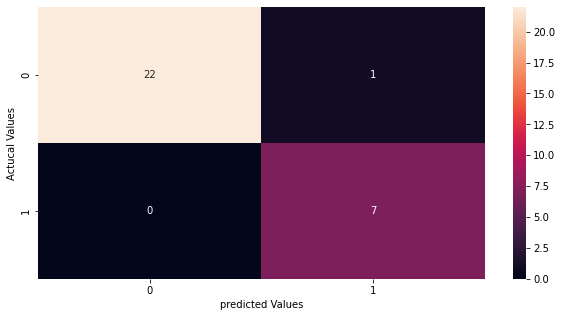

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
cmtest = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cmtest, annot=True)
plt.xlabel("predicted Values")
plt.ylabel("Actucal Values")


Classification report --> It is performance evaluion metric in ML. It is used to shoe the precision, recll, F1-Score and support to the trained classification model.
It measure the quality of preditions from classification algorithm. That how many predictions are True or False. That is TP, FP, FN, TN.


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



KNN-
K-Nearest Neighbour Algorithm --> It is a non parametric, Suprived learnign classifier, which uses proximity to make classifications or predictions about grouping of an individual data point. It can also be used for eiter regression or classification problems. 

For classification problem, a class lebel is assigned on the basis of a majority vote that is most frequently represented around a given data point is used.

Computation of KNN distance -->
Euclidean Distance(p=2)= This is the most commonly used distance measure and it is limited to real valued vectors. It measure a straight line between the query point and the other point being measure.
d(x, y) = root(summation(i=0, n) pow(yi-xi), 2)

Manhatten Distance(p=1) --> It measure the absolute values between two points. it is also reffered to taxicab distce or city block distance as it is commonly visualized with a grid, illustrating how one might navigate form one address to another via city address.

Manhatten Distance = d(x, y) = (summation(i=1,m) mod(xi-yi))
Advantages of KNN
1. Easy to impliment
2. Adaptseasily
3. Few hyperparameters --> KNN requires a K value and a distance metric, which is low when compared to another ML algorithms.



In [30]:
# Implimeantation of KNN
from sklearn.neighbors import KNeighborsClassifier
testErrorRates = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train, y_train)
    y_knn_pred_test = knn_model.predict(scaled_x_test)
    testError= 1-accuracy_score(y_test, y_knn_pred_test)
    testErrorRates.append(testError)
testErrorRates

[0.1333333333333333,
 0.19999999999999996,
 0.16666666666666663,
 0.19999999999999996,
 0.16666666666666663,
 0.19999999999999996,
 0.16666666666666663,
 0.19999999999999996,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.1333333333333333,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.1333333333333333,
 0.16666666666666663,
 0.16666666666666663,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998]

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=26)
knn_model.fit(scaled_x_train, y_train)
y_knn_pred_test = knn_model.predict(scaled_x_test)
print(classification_report(y_test,y_knn_pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.57      0.73         7

    accuracy                           0.90        30
   macro avg       0.94      0.79      0.83        30
weighted avg       0.91      0.90      0.89        30



In [32]:
# finding the accuracy of KNN model
knn_acc = accuracy_score(y_test, y_knn_pred_test)
accuracy_list.append(100*knn_acc)
print(Fore.GREEN+ "Accuracy of KNN model is : ", "{:.2f}%".format(100*knn_acc))

Accuracy of KNN model is :  90.00%


Text(69.0, 0.5, 'Actual Values')

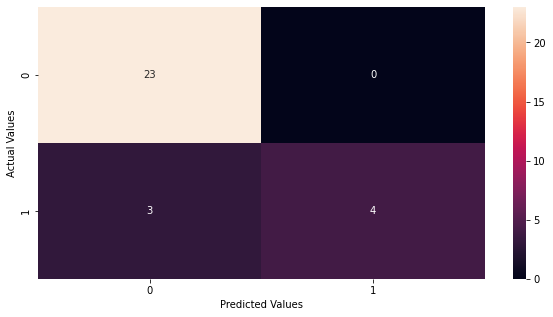

In [33]:
# heatmap confusion matric
cmtest0 = confusion_matrix(y_test, y_knn_pred_test)
plt.figure(figsize=(10,5))
sns.heatmap(cmtest0, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

Support Vector Machine 
SVM are set of suprivised methods for classification, regression and outlier dectection. All these are commmon in machine learning.
There are specific types of SVM's that we can use for particular machine learning problems like Support vector Regression(SVR) which is an extension of Support vector classification (SVC).
--> Working of SVM 
        A simple linear SVM classififer works by making a straight line between two classes. That  means all of the data points on one    
        side of the line will represent a category and the data points on other side will be put into a different category. 
        It chooses the best line to classify the data points. It chooses the line that seperates the data and is the furthest away from 
        closet data as possible.
--> Application of SVM
        1. SVM is used to different application like handwriting recognition, intrusion detection, face detection, email classification, 
           gene classfication etc.
        2. It can handle both classification and regression on linear and non-linear data.
        3. It can find the complex relation between you data without any need to do a lot of transformation on your own.
        4. It is very effective on datasets with multiple featuers, like medical or financial.
        5. Effective where the number of features are greater than number of data points.
        6. It uses subset of traning points in decesion function called support vector which makes it memory efficient.
        7. Different kernal function can be specified for the decesion function. You can use common kernal.
        

In [34]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
svm=SVC()
pram_grid = {'C':[0.01, 0.01, 1], 'kernel':['linear','rbf']}
grid = GridSearchCV(svm, pram_grid)
grid.fit(scaled_x_train, y_train)
GridSearchCV(estimator=SVC(), param_grid=pram_grid)
grid.best_params_


{'C': 1, 'kernel': 'linear'}

In [35]:
svm_pred= grid.predict(scaled_x_test)
final_model = SVC(kernel='linear', C=1)
final_model.fit(scaled_x_train, y_train)


SVC(C=1, kernel='linear')

In [36]:
y_final_pred= final_model.predict(scaled_x_test)
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
svm_acc = accuracy_score(y_test, y_final_pred)
accuracy_list.append(100*svm_acc)
print(Fore.GREEN+'Accuracy of SVM is : ', "{:.2f}%".format(100*svm_acc))

Accuracy of SVM is :  96.67%


Text(69.0, 0.5, 'Actual Values')

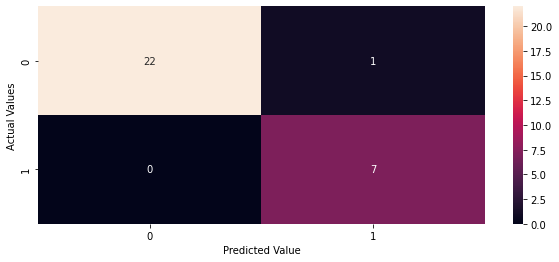

In [38]:
cmtest1 = confusion_matrix(y_test, y_final_pred)
plt.figure(figsize=(10,4))
sns.heatmap(cmtest1, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Values")


In [39]:
print(accuracy_list)
Accuracy = {'LogisticRegression ':accuracy_list[0], 'KNN' : accuracy_list[1], 'SVM' : accuracy_list[2]}
print(Accuracy)

[96.66666666666667, 90.0, 96.66666666666667]
{'LogisticRegression ': 96.66666666666667, 'KNN': 90.0, 'SVM': 96.66666666666667}


Saving the model

In [40]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

Now in the second phase we are going to work on the Stroke prediction

In [41]:
import warnings 
warnings.filterwarnings('ignore')

In [200]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [43]:
# Data priocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [44]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [45]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

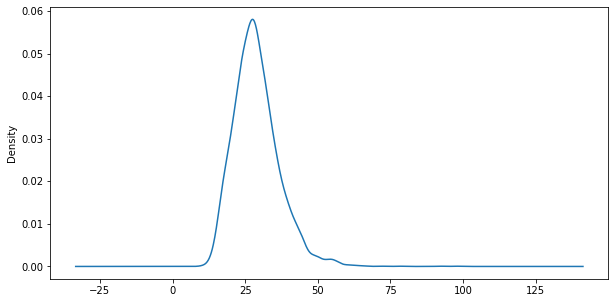

In [46]:
# we will check the distribution of missing data column 
# From above cell we can see that the data column [bmi] is having 201 missing values
plt.figure(figsize=(10,5))
data['bmi'].plot(kind='kde')
plt.show()

Missing Values Handling

In [47]:
# we will handle missing values we will fill all null values by mean 
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data Filtering or removing the unnecessary column 

In [48]:
data.drop(['id'],axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Exploratory Data Analysis --> It is an approach of analyzing data sets to summrize their main characteristics, often using statiscal graphics and other data visualizatoin.

In this Our target Vairable will be ['Strokr']

<AxesSubplot: ylabel='Density'>

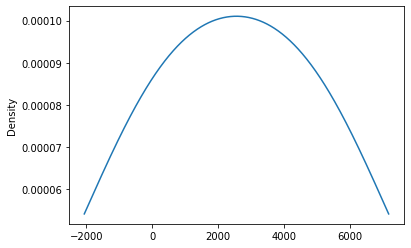

In [49]:
data['stroke'].value_counts().plot(kind='kde')

<AxesSubplot: >

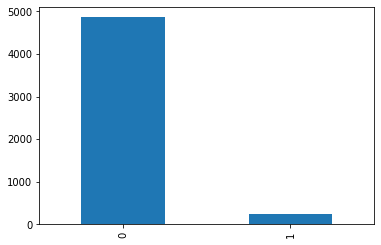

In [50]:
data['stroke'].value_counts().plot(kind='bar')

Checking for outliers in our data
Outliers --> These are the observation that lies an abnorma distance from other values in a random sample of population. The points in data that differs significantly from the observatons. These may occur due to a variablity in the measurement, result of experimental error etc.

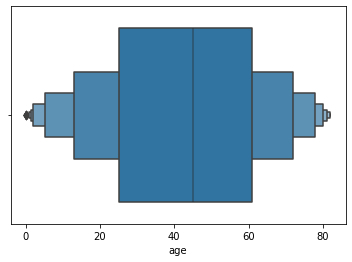

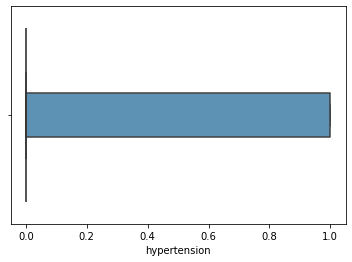

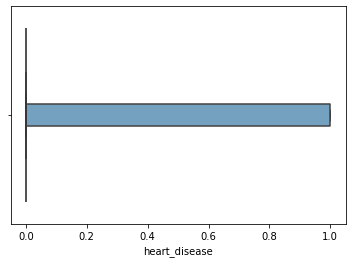

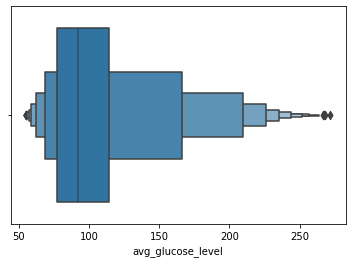

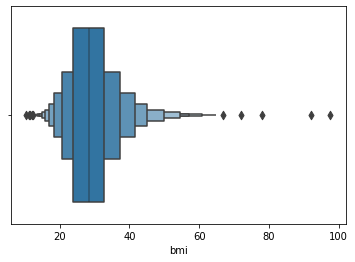

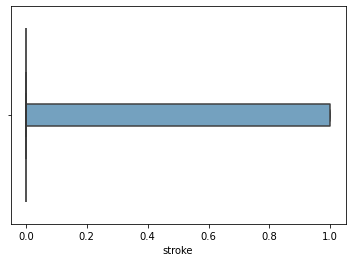

In [51]:
num= data.select_dtypes(exclude='object')
for i in num.columns:
    sns.boxenplot(data=num, x=i)
    plt.show()

In [52]:
# working on factor Gender
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

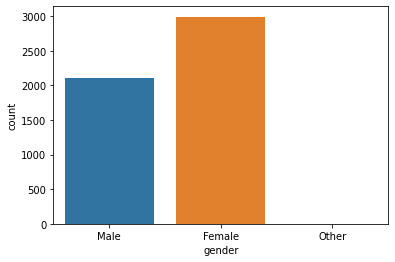

In [53]:
sns.countplot(data=data, x='gender')
plt.show()

Cheking for Stroke according to Gender

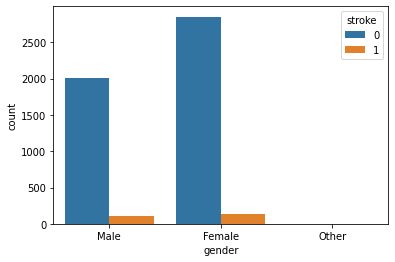

In [54]:
# O--> male  1 -->female
sns.countplot(data=data, x='gender', hue='stroke')
plt.show()

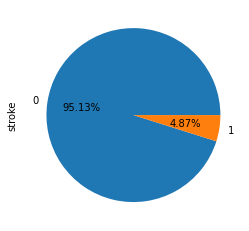

In [55]:
data['stroke'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.show()

Working on factor age

In [56]:
# More men then women had strokes
data.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


In [57]:
print("More men then women had strokes")

More men then women had strokes


Checking for factor married statues

In [58]:
data['ever_married'].value_counts()


Yes    3353
No     1757
Name: ever_married, dtype: int64

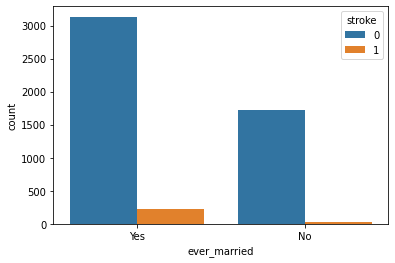

In [59]:
sns.countplot(data=data, x='ever_married', hue='stroke')
plt.show()

Working on factor type of work

In [60]:
data['work_type'].unique()


array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [61]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

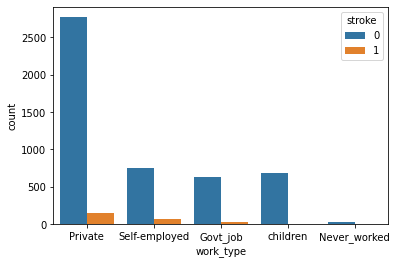

In [62]:
sns.countplot(data=data, x='work_type', hue='stroke')
plt.show()

Working on the facor Residance Type 

In [63]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [64]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

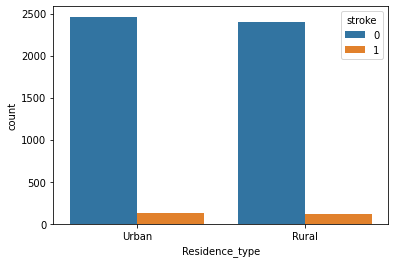

In [65]:
sns.countplot(data=data, x='Residence_type', hue='stroke')
plt.show()

Working on Smoking Facotr

In [66]:
data['smoking_status'].value_counts()


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

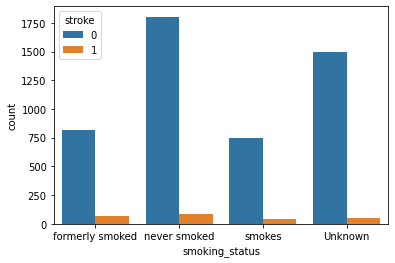

In [67]:
sns.countplot(data=data, x='smoking_status', hue='stroke')
plt.show()

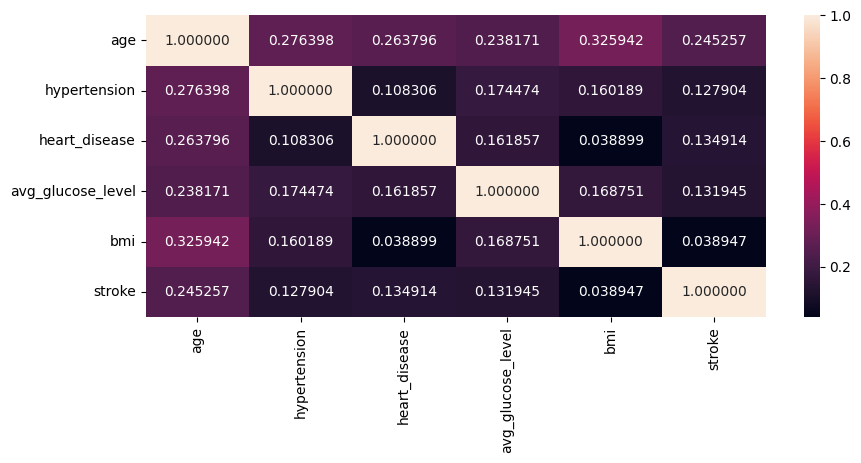

In [68]:
# Aanlysing by heat Map
plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(data.corr(), annot=True, fmt='2f')
plt.show()

Encoding the categorical Vairables --> It is the process of convertign the categoricl data integer  format so that the data with converted categorical values can be provided to the different models. Binary encoding is assumed as the best way of encoding. it first convert the data into numerical usng an ordinal encoder. Then the number are transformed in the binary number. After that binary value is split into different columns. Binary Encoding works well when there ara a high number of categories.

In [69]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

LabelEncoder --. It is used to normalize the labels. It can also used to transform non-numerical labels(as they as hashable and comparable) to numerical feilds labels. 

In [70]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()

In [71]:
data['gender'] = lr.fit_transform(data['gender'])
data['ever_married'] = lr.fit_transform(data['ever_married'])
data['work_type'] = lr.fit_transform(data['work_type'])
data['Residence_type'] = lr.fit_transform(data['Residence_type'])
data['smoking_status'] = lr.fit_transform(data['smoking_status'])



Splitting the data into dependent and independent vairables

In [72]:
X= data.drop('stroke',axis=1).values
X

array([[  1.        ,  67.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,  61.        ,   0.        , ..., 202.21      ,
         28.89323691,   2.        ],
       [  1.        ,  80.        ,   0.        , ..., 105.92      ,
         32.5       ,   2.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [73]:
Y= data['stroke'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Splitting the data using sklearn model using-->train_test_split

In [74]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.20, random_state=0) 

Applying Logistic Regression

In [75]:
classifier = LogisticRegression()
classifier.fit(X_train,  Y_train)

LogisticRegression()

In [76]:
perd = classifier.predict(X_test)
perd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
Y_test.sum()

54

Evalution for Logistic Regression

In [78]:
print(confusion_matrix(Y_test, perd))

[[968   0]
 [ 54   0]]


In [79]:
print(classification_report(Y_test,perd))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [80]:
print("accuracy score :", accuracy_score(Y_test, perd))

accuracy score : 0.9471624266144814


Using KNN Classifier


In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred=knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

Evalution  of KNN Classifier

In [83]:
print("Accuracy Score : ", accuracy_score(Y_test, pred))


Accuracy Score :  0.9422700587084148


In [84]:
Y_train.sum()

195

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight='balanced')
classifier.fit(X_train,Y_train)
Y_pred1 = classifier.predict(X_test)
Y_pred1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
Y_test


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [87]:
print('Accuracy:', accuracy_score(Y_pred1, Y_test))


Accuracy: 0.9481409001956947


In [88]:
print(confusion_matrix(Y_test, Y_pred1))

[[968   0]
 [ 53   1]]


In [89]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5,class_weight='balanced'))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(class_weight='balanced', random_state=0,
                           tol=1e-05))])

In [90]:
print(clf.named_steps['linearsvc'].coef_)

[[-0.00850195  0.68933525  0.02284475  0.04248686 -0.02567504  0.02678692
   0.03366119  0.06194108 -0.00360908 -0.0090689 ]]


In [91]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),SVC(gamma='auto',class_weight='balanced',kernel='poly'))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', gamma='auto', kernel='poly'))])

In [92]:
Y_pred2= clf.predict(X_test)
Y_pred2

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [93]:
print(confusion_matrix(Y_test, Y_pred2))

[[784 184]
 [ 23  31]]


In [94]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
Y_pred2 = classifier.predict(X_test)
Y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
Y_test


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
print('Accuracy:', accuracy_score(Y_pred1, Y_test))


Accuracy: 0.9481409001956947
